# Analysis of CTA Ridership data

In [14]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('cta_ridership.db')

### Check that data has been loaded into tables as expected

In [7]:
# Annual ridership data
annual_ridership_query = """
SELECT * FROM annual_boarding_totals;
"""

annual_df = pd.read_sql(annual_ridership_query, conn)
annual_df

,year,bus,paratransit,rail,total
0,1988,"430,089,500","435,400","174,436,000","604,960,900"
1,1989,"420,572,700","924,800","168,658,800","590,156,300"
2,1990,"421,183,734","930,802","165,732,575","587,847,111"
3,1991,"392,088,602","949,460","147,608,116","540,646,178"
4,1992,"370,335,119","1,011,669","137,372,830","508,719,618"
5,1993,"326,655,953","1,167,904","135,369,734","463,193,591"
6,1994,"331,520,700","1,209,900","143,579,100","476,309,700"
7,1995,"306,075,585","1,270,274","135,461,619","442,807,478"
8,1996,"302,115,116","1,244,209","142,040,486","445,399,811"
9,1997,"287,628,293","1,235,085","151,010,374","439,873,752"


In [ ]:
### Daily Bus Ridership Data
bus_query = """
SELECT * FROM daily_ridership_bus_routes;
"""

bus_df = pd.read_sql(bus_query, conn)
bus_df

,route,date,daytype,rides
0,1,2001-01-02,W,5813
1,1,2001-01-03,W,6809
2,1,2001-01-04,W,6907
3,1,2001-01-05,W,6154
4,1,2001-01-08,W,6126
...,...,...,...,...
1081968,X99,2005-03-21,W,55
1081969,X99,2005-03-22,W,58
1081970,X99,2005-03-23,W,49
1081971,X99,2005-03-24,W,53


In [17]:
# Daily L (train) ridership data
train_ridership_query = """
SELECT * FROM daily_ridership_l_stations;
"""

train_df = pd.read_sql(train_ridership_query, conn)
train_df

,station_id,stationname,date,daytype,rides
0,40350,UIC-Halsted,2001-01-01,U,273
1,41130,Halsted-Orange,2001-01-01,U,306
2,40760,Granville,2001-01-01,U,1059
3,40070,Jackson/Dearborn,2001-01-01,U,649
4,40090,Damen-Brown,2001-01-01,U,411
...,...,...,...,...,...
1284672,41670,Conservatory,2025-08-31,U,558
1284673,41680,Oakton-Skokie,2025-08-31,U,250
1284674,41690,Cermak-McCormick Place,2025-08-31,U,1459
1284675,41700,Washington/Wabash,2025-08-31,U,6586


## Begin Analysis

### Analysis 1: How has ridership for the L and Buses changed 5 years before and 5 years after Covid-19?

In [21]:
# analysis starts on 11/01/2014 and ends on 11/01/2025 due to 2025's data availability
covid_ridership_impacts_query = """
with total_ridership as
   (SELECT train.date as date, train.rides as train_ride_count, bus.rides as bus_ride_count
    FROM daily_ridership_l_stations train
    INNER JOIN daily_ridership_bus_routes bus
        ON train.date = bus.date
    WHERE train.date BETWEEN '2014-11-01' AND '2025-11-01')
SELECT 'pre-pandemic' as timeframe, sum(train_ride_count), sum(bus_ride_count) FROM total_ridership WHERE date < '2020-01-01'
UNION
SELECT 'post-pandemic' as timeframe, sum(train_ride_count), sum(bus_ride_count) FROM total_ridership WHERE date >= '2020-01-01'
"""

covid_ridership_df = pd.read_sql(covid_ridership_impacts_query, conn)
covid_ridership_df

,timeframe,sum(train_ride_count),sum(bus_ride_count)
0,post-pandemic,58407267537,119981507510
1,pre-pandemic,117245789043,186724939005


## Thoughts
I'm really surprised to see how much ridership for both bus and trains have boomed after the pandemic. I honestly expected to see the opposit results, especially because the "post-pandemic" data includes 2020 in its counts. The rate of increase is truly what's the most shocking to me. Chicagoans only have half a year to spend their time outside, and 2020 took that away from its residents. Maybe the people are compensating or being more grateful for the time they have to spend outdoors? Or it could be that we're seeing a decrease in car ownership in the city. Hard to tell without other statistics on hand.\
I've heard that though Chicago has lost the largest amount of residents moving out of the city in a year (I believe back in 2023), the same year also saw an increase in population (I contributed to the latter statistic).

## Analysis 2: What is the top train station of 2025 so far? What about the least?

In [10]:
l_station_popularity_query = """
SELECT distinct stationname, sum(rides) as total_rides
FROM daily_ridership_l_stations
WHERE date >= '2025-01-01'
GROUP BY stationname
ORDER BY total_rides DESC
"""

l_ridership_df = pd.read_sql(l_station_popularity_query, conn)
l_ridership_df

,stationname,total_rides
0,Lake/State,2263853
1,O'Hare Airport,2115712
2,Clark/Lake,2008968
3,Fullerton,1677029
4,State/Lake,1673523
...,...,...
139,Berwyn,74444
140,Lawrence,71637
141,Halsted/63rd,62312
142,Kostner,60504


### Thoughts
I'm not surprised to see State & Lake station having the highest ridership, considering it's located right in the middle of downtown Chicago. However, I do see another entry for State & Lake at number 4. It's difficult to tell which of the two entries belong to the Redline subway station or the platform station housing Brown, Purple, Green, Pink, and Orange lines. I'd say it's safe to assume that the latter hold the place at the number 1 spot, considering this is the intersection where North, South, and West side transit links together.  However, seeing the redline isn't surprising, either, as this station is located right next to the Chicago Theater. Additionally, this train line takes commuters to both the Sox and Cubs stadiums.\
\
King Drive being placed bottom is not too surprising. This is station is located a few blocks away from the notorious O Block. This isn't an area frequented by many outside of residents due to the area's bad reputation, unfortunately. 

## Analysis 3: In the spirit of the Holidays, let's take a look at how Christmas ridership has changed over the years.

In [15]:
holiday_query = """
SELECT strftime('%Y', train.date) AS year, sum(train.rides) as total_train_rides, sum(bus.rides) as total_bus_rides
FROM daily_ridership_l_stations train
    JOIN daily_ridership_bus_routes bus
    ON train.date = bus.date
WHERE train.date LIKE '%-12-25'
GROUP BY year
ORDER BY year ASC
"""

holiday_ridership_df = pd.read_sql(holiday_query, conn)
conn.close()

holiday_ridership_df

,year,total_train_rides,total_bus_rides
0,2001,6639095,30982270
1,2002,6952660,33534294
2,2003,7377128,34885140
3,2004,6498958,30081422
4,2005,7720504,37143366
5,2006,8148072,34148302
6,2007,8148712,35180500
7,2008,8268920,33726278
8,2009,8735583,34819104
9,2010,9141264,32804919


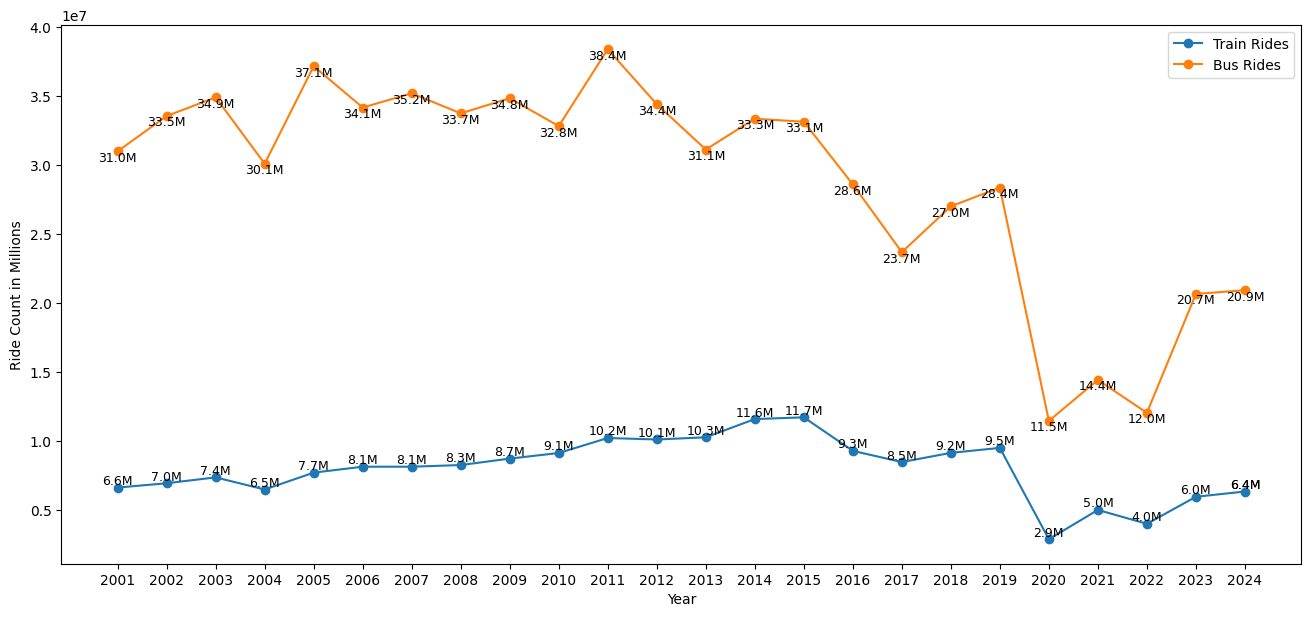

In [ ]:
# Build line chart to visualize holiday ridership trends
import matplotlib.pyplot as plt

# set size of the plot
plt.figure(figsize=(16, 7))

# create line plot
plt.plot(holiday_ridership_df['year'], holiday_ridership_df['total_train_rides'], label='Train Rides', marker='o')
plt.plot(holiday_ridership_df['year'], holiday_ridership_df['total_bus_rides'], label='Bus Rides', marker='o')
plt.xlabel('Year')
plt.ylabel('Ride Count in Millions')

# Add value labels on each point
for i, year in enumerate(holiday_ridership_df['year']):
    train_val = holiday_ridership_df['total_train_rides'].iloc[i]
    bus_val = holiday_ridership_df['total_bus_rides'].iloc[i]
    plt.text(year, train_val, f'{train_val/1e6:.1f}M', ha='center', va='bottom', fontsize=9)
    plt.text(year, bus_val, f'{bus_val/1e6:.1f}M', ha='center', va='top', fontsize=9)

plt.text(year, train_val, f'{train_val/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

plt.legend()
plt.show()

#### Thoughts
I contributed in 2024, 2023, and 2022 to the Christmas day ridership. I truly didn't expect this high of a number, but there are plenty of citizens who call Chicago home, so that can't be too surprising.\
It makes sense to see that ridership for both the L and the bus continue to keep up in 2008-2011 after the major financial crisis. We can assume that more residents chose to save money on gas and/or purchasing cars by taking public transit. \
As expected, there is a major dip in 2020, though recovery seems to be coming. Usage of the L on Christmas day in 2024 matches the levels seen back in 2001.